## Bubble Sort

In [1]:
arr=[1,9,2,8,3,7,4,6,5]

In [2]:
from copy import copy
arr=[1,9,2,8,3,7,4,6,5]
raw_arr=copy(arr)
for i in range(len(arr)):
    for j in range(i+1,len(arr)):
        if arr[i]<arr[j]:
            #print(arr[i],arr[j])
            temp=arr[i]
            arr[i]=arr[j]
            arr[j]=temp
print(raw_arr)
print(arr)

[1, 9, 2, 8, 3, 7, 4, 6, 5]
[9, 8, 7, 6, 5, 4, 3, 2, 1]


In [3]:
from copy import copy
arr=[1,9,2,8,3,7,4,6,5]
out_arr=copy(arr)
_sorted=False
while not _sorted:
    _sorted=True
    for i in range(len(arr)-1):
        if arr[i]<arr[i+1]:
            _sorted=False
            #print(arr)
            temp=arr[i]
            arr[i]=arr[i+1]
            arr[i+1]=temp
    #print(_sorted)
print(arr)

[9, 8, 7, 6, 5, 4, 3, 2, 1]


# Quic sort

In [13]:
from copy import copy
arr=[1,9,2,8,3,7,4,6,5]
raw_arr=copy(arr)
def partition(arr,low,high):
    pivot=arr[(low+high)//2]
    while(low<high):
        while arr[low]<pivot and low < len(arr):
            low+=1
        while arr[high]>pivot and high >-1:
            high-=1
        
        if low<=high:
            temp=arr[low]
            arr[low]=arr[high]
            arr[high]=temp
            low+=1
            high-=1
    return low
def quicksort(arr,low,high):
    
    if (low>=high):
        return arr
    ind=partition(arr,low,high)
    arr=quicksort(arr,low,ind-1)
    arr=quicksort(arr,ind,high)
    return arr
arr=quicksort(arr,0,len(arr)-1)
print(raw_arr)
print(arr)

[1, 9, 2, 8, 3, 7, 4, 6, 5]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [12]:
from copy import copy
arr=[1,9,2,8,3,7,4,6,5]
raw_arr=copy(arr)
temp=[0]*len(arr)

def mergeHalf(L,R):
    
    _arr=L+R
    k=0
    while len(L) and len(R):
        if L[0] < R[0]:
            _arr[k]=L[0]
            L=L[1:]
            k+=1
        else:
            _arr[k]=R[0]
            R=R[1:]
            k+=1
    
    if len(L) : _arr[k:]=L
    if len(R) : _arr[k:]=R
    return _arr

def mergeHalf(L,R):
    
    _arr=L+R
    i=0;j=0;k=0
    while i < len(L) and j < len(R):
        if L[i]<R[j]:
            _arr[k]=L[i]
            i+=1
            k+=1
        else:
            _arr[k]=R[j]
            j+=1
            k+=1
    
    if i< len(L) : _arr[k:]=L[i:]
    if j< len(R) : _arr[k:]=R[j:]
    return _arr
    
def mergeSort(arr):
    if len(arr)>1:
        low=0;high=len(arr)
        ind=(low+high)//2
        L=arr[low:ind]
        R=arr[ind:high]
        
        L=mergeSort(L)
        R=mergeSort(R)
        print('merge',L,R)
        arr=mergeHalf(L,R)
        print(arr)
    return arr
arr=mergeSort(arr)
#print(raw_arr)
print(arr)

merge [1] [9]
[1, 9]
merge [2] [8]
[2, 8]
merge [1, 9] [2, 8]
[1, 2, 8, 9]
merge [3] [7]
[3, 7]
merge [6] [5]
[5, 6]
merge [4] [5, 6]
[4, 5, 6]
merge [3, 7] [4, 5, 6]
[3, 4, 5, 6, 7]
merge [1, 2, 8, 9] [3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### Heap Sort

In [35]:
def heapify(arr,n,i):
    left_ind=2*i+1
    right_ind=2*i+2
    largest=i
    
    #if left_ind<n:
    if left_ind<n and arr[largest]<arr[left_ind]:
            largest=left_ind
            
    #if right_ind<n:
    if right_ind<n and arr[largest]<arr[right_ind]:
            largest=right_ind
        
    if largest !=i:
        arr[i],arr[largest]=arr[largest],arr[i]
        arr=heapify(arr,n,largest)
    return arr

def heapsort(arr):
    n=len(arr)
    for i in range(n//2-1,-1,-1):
        heapify(arr,n,i)
    
    for i in range(n-1,0,-1):
        arr[i],arr[0]=arr[0],arr[i]
        heapify(arr,i,0)
    return arr

arr=[1,7,9,8,3,2,6,4,5,12,10,11]
heapsort(arr)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Binary Tree Sort

1. Node object based
2. Array based (high space complexity ~ 2^n)

In [37]:
class Node():
    def __init__(self,val):
        self.val=val
        self.left=None
        self.right=None
        
    def insert(self,elem):
        if elem < self.val:
            if self.left == None:
                self.left=Node(elem)
            else:
                self.left.insert(elem)
        if elem > self.val:
            if self.right == None:
                self.right=Node(elem)
            else:
                self.right.insert(elem)
        
    def print_tree(self,queue=[]):
        if self.left: queue=self.left.print_tree(queue)
        queue.append(self.val)
        if self.right: queue=self.right.print_tree(queue)
        return queue
    
arr=[4,9,1,5,8,6,3,2,7,15,13,11,12,10,14]
node=Node(arr[0])
for elem in arr[1:]:
    node.insert(elem)
node.print_tree()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [34]:
class BTree():
    def __init__(self,arr):
        self.N=(pow(2,len(arr))-2)
        self.tree_arr=[None]*self.N
        self.tree_arr[0]=arr[0]
        self.arr=arr
        
    def build(self):
        for i in range(1,len(self.arr)):
            self.insert(self.arr[i])

    def insert(self,elem,i=0):  
            l_ind=2*i+1
            r_ind=2*i+2
            
            if elem < self.tree_arr[i]:
                if self.tree_arr[l_ind]!=None:
                    self.insert(elem,i=l_ind)
                else:
                    self.tree_arr[l_ind]=elem

            if elem > self.tree_arr[i]:
                if  self.tree_arr[r_ind]!=None:
                    self.insert(elem,i=r_ind)
                else:
                    self.tree_arr[r_ind]=elem
        

    def get_tree(self,i,queue=[]):
        l_ind=2*i+1
        r_ind=2*i+2
        if l_ind< self.N : queue=self.get_tree(l_ind,queue=queue)
        queue.append(self.tree_arr[i])
        if r_ind< self.N : queue=self.get_tree(r_ind,queue=queue)
        return queue
        
    def tprint(self):
        queue=self.get_tree(0)
        out=[elem for elem in queue if elem != None]
        #print(out)
        return out

arr_1=[3,7,9,8,1,2,6,4,5,12,13,11,14,10]
arr_2=[5,15,2,7,12,17,1,3,6,8,11,13,16,18]

_btree=BTree(arr_1)
_btree.build()
_btree.tprint()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [48]:
data=[1,2,3,4,5,6,7,8]
probs=[1,2,3,4,5,6,7,8]
class SumTree():
    
    def __init__(self,capacity):
        self.data=[0]*capacity
        self.tree=[0]*(2*capacity-1)
        self.dind=0
        self.capacity=capacity
        
    def add(self,data,prob):
        self.data[self.dind]=data
        tind=self.dind+self.capacity-1
        self.update(tind,prob)
        self.dind+=1
        
    def update(self,tind,prob):
        change=prob-self.tree[tind]
        self.tree[tind]=prob
        pind=(tind-1)//2
        while(pind>-1):
            self.tree[pind]+=change
            pind=(pind-1)//2
            
    def get(self,prob):
        tind=self.retrive(prob,0)
        return self.data[tind-self.capacity+1]
    
    def retrive(self,prob,idx):
        lind=2*idx+1
        rind=2*idx+2
        if lind>=len(self.tree): 
            return lind
        if self.tree[lind]>prob:
            ind=self.retrive(prob,lind)
        else:
            ind=self.retrive(self.tree[lind]-prob,rind)
        return ind
    
_stree=SumTree(10)
for val,prob in zip(data,probs):
    _stree.add(val,prob) 

In [49]:
_stree.tree[0]

36

In [50]:
import numpy as np
for i in range(10):
    prob=np.random.randint(0,36)
    print(_stree.get(prob))

IndexError: list index out of range

### Recursion :  Fibonacci Series

In [15]:
def fib_1(n):
    if n==0: return 0
    elif n==1: return 1
    else:
        return fib_1(n-1)+ fib_1(n-2)
    
def fib_2(n):
    if n==0: return 0
    elif n==1: return 1
    else: 
        a=0;b=1
        for j in range(n-1):
            fib=a+b
            a=b
            b=fib
    return fib

def fib_3(n):
    _init_val=[0,1]
    if n==0: return 0
    elif n==1: return 1
    fib=0
    for i in range(n-1):
        fib=_init_val[0]+_init_val[1]
        _init_val=_init_val[1:]+[fib]
    return fib

for i in range(0,10):
    print('nth: ',i,'fib_1: ' ,fib_1(i),'fib_2: ',fib_2(i),'fib_3: ', fib_3(i))

nth:  0 fib_1:  0 fib_2:  0 fib_3:  0
nth:  1 fib_1:  1 fib_2:  1 fib_3:  1
nth:  2 fib_1:  1 fib_2:  1 fib_3:  1
nth:  3 fib_1:  2 fib_2:  2 fib_3:  2
nth:  4 fib_1:  3 fib_2:  3 fib_3:  3
nth:  5 fib_1:  5 fib_2:  5 fib_3:  5
nth:  6 fib_1:  8 fib_2:  8 fib_3:  8
nth:  7 fib_1:  13 fib_2:  13 fib_3:  13
nth:  8 fib_1:  21 fib_2:  21 fib_3:  21
nth:  9 fib_1:  34 fib_2:  34 fib_3:  34


### Recursion : Counting .txt files in dirrectories

In [11]:
import glob

def print_fname(_root):
   global _count;
   for _dir in glob.glob(_root):
        if _dir[-4:]=='.txt':
            print(_dir)
            _count=_count+1
        else:
            print_fname(_dir+'/*')
_count=0
print_fname('test/*')
print(_count)

test\1.txt
test\branch1\b1.txt
test\branch1\branch2\b2.txt
test\level1\2.txt
test\level1\level2\3.txt
5


### Binary Tree

In [1]:
from collections import deque
from copy import deepcopy
class Node():
    def __init__(self,data):
        self.data=data
        self.left=None
        self.right=None
        self.queue=[]
        self.visited=False
        
    def insert(self,data):
        if data < self.data:
            if self.left ==None:
                self.left=Node(data)
            else:
                self.left.insert(data)

        if data > self.data:
            if self.right ==None:
               self.right=Node(data)
            else:
                self.right.insert(data)
        
            
    def print_tree(self):
        global queue
        if self.left: self.left.print_tree()
        #print(self.data)
        queue.append(self.data)
        if self.right: self.right.print_tree()
        
tree=Node(10)
#for i in [5,15,2,11,13,16,18,7,12,17,1,3,6,8]:
for i in [5,15,2,7,12,17,1,3,6,8,11,13,16,18]a:
    tree.insert(i)
queue=[]
tree.print_tree()
queue

[1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18]

In [2]:
def bfs(tree):
    curr_tree=deepcopy(tree)
    queue=deque()
    out=[]
    curr_tree.visited=True
    queue.append(curr_tree)
    out.append(curr_tree.data)
    print(out)
    while len(queue):
        curr_tree=queue.popleft()
        if curr_tree.left==None and curr_tree.right==None:
            continue
        for node in [curr_tree.left,curr_tree.right]:
            if node:
                if node.visited ==False:
                     node.visited==True
                     out.append(node.data)
                     #print(out)
                     queue.append(node)
    return out
_out=bfs(tree)
_out

count=0
level=0
arr=[2**i for i in range(int(math.log(len(_out)+1,2)))]
hspace=(3*len(arr))
_start=True
for i,val in enumerate(_out):
    count+=1
    
    if _start==True:
        for _ in range(hspace//arr[level]): 
            print(" ",end="")
    else:
        for _ in range(hspace//arr[level]): 
            print("  ",end="")
    
    print(str(val).zfill(2),end="")
    if count==arr[level]:
        count=0
        level+=1
        _start=True
        print("",end="\n\n")
    else: _start=False

[10]


NameError: name 'math' is not defined

### Breadth First Search

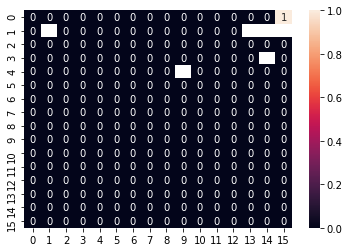

In [123]:
import numpy as np
import seaborn as sns
from collections import deque
from matplotlib import pyplot as plt
import matplotlib.animation as animation


class grid_env():
    def __init__(self,w=16,h=12,nodes=[],goal=[]):
        self.env=np.zeros((h,w),dtype=np.float64)
        self.env[goal[0],goal[1]]=1
        for [x,y] in nodes:
            self.env[x,y]=np.nan
    def make(self):
        return self.env.copy()
    def reset(self,seed=0):
        self.env=np.zeros((h,w),dtype=np.float64)
        self.env[goal[0],goal[1]]=1
        np.random.seed(seed)
        for i in range(6):
            a=np.random.randint(h)
            b=np.random.randint(w)
            self.env[a,b]=np.nan

w=16
h=16
env=np.zeros((h,w),dtype=np.float64)
goal=[0,w-1]
nodes=[[1,w-1],[1,w-2],[1,w-3],[3,w-2],[4,9],[1,1]]
env=grid_env(w=w,h=h,nodes=nodes,goal=goal)
nenv=env.make()
sns.heatmap(nenv,annot=True)

In [124]:
class Node():
    def __init__(self,i,j):
        self.val=[i,j]
        self.edges=[]
        self.root=None
        self.left=self.is_valid([i,j-1])
        self.right=self.is_valid([i,j+1])
        self.up=self.is_valid([i-1,j])
        self.down=self.is_valid([i+1,j])
        
        self.ul=self.is_valid([i-1,j-1])
        self.ur=self.is_valid([i-1,j+1])
        self.dl=self.is_valid([i+1,j-1])
        self.dr=self.is_valid([i+1,j+1])
        
    def is_valid(self,lst):
        [a,b]=lst
        if a >= 0 and a < h and b>= 0 and b<w and np.isnan(nenv[a,b]) == False:
            self.edges.append([a,b])
            return [a,b]
        else:
            return  None
        

In [125]:
def bfs(start,goal):
    vis_nodes=env.make()
    node_q=deque()
    root_dict={}
    frames=[] 

    x,y=start
    node=Node(x,y)
    vis_nodes[x,y]=10
    node_q.append(node)

    while(len(node_q)):
        node=node_q.popleft()
        root=node.val
        for [x,y] in node.edges:
            if vis_nodes[x,y]==10 : continue
            if [x,y] != goal: 
                vis_nodes[x,y]=10
                node = Node(x,y)
                node_q.append(node)
                root_dict[str([x,y])] = root

            else:
                root_dict[str([x,y])] = root
                node_q=deque()
                break
        frames.append(vis_nodes.copy())
    
    return root_dict,frames

start=[h-1,0]
goal=[0,w-1]
root_dict,frames=bfs(start,goal)

<IPython.core.display.Javascript object>


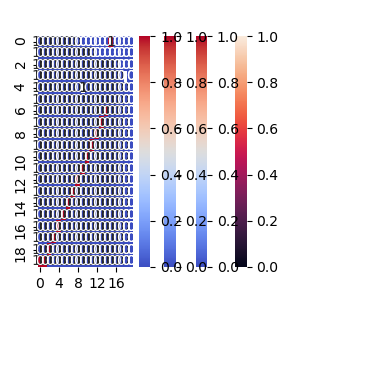

KeyboardInterrupt: 

In [190]:
def show_anim():
    %matplotlib notebook
    plt.ion()
    fig=plt.figure(figsize=(3,3))
    ax=fig.gca()
    fig.show()

    for frame in frames:
        ax.clear()
        sns.heatmap(frame,annot=True,cbar=False,ax=ax)
        fig.canvas.draw()
    plt.ioff()
    %matplotlib inline
show_anim()

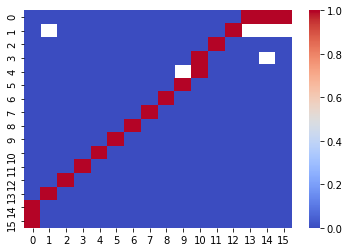

In [127]:
point=goal
path=[goal]
path_map=env.make()

while(1):
   if point==start:break
   point=root_dict[str(point)]
   path.append(point)
   path_map[point[0],point[1]]=1
   
sns.heatmap(path_map,annot=False,cmap='coolwarm')
plt.show()


In [211]:
class Node():
    def __init__(self,i,j):
        self.val=[i,j]
        self.edges=[]
        self.root=None
        self.left=self.is_valid([i,j-1])
        self.right=self.is_valid([i,j+1])
        self.up=self.is_valid([i-1,j])
        self.down=self.is_valid([i+1,j])
        
        self.ul=self.is_valid([i-1,j-1])
        self.ur=self.is_valid([i-1,j+1])
        self.dl=self.is_valid([i+1,j-1])
        self.dr=self.is_valid([i+1,j+1])
        
    def is_valid(self,lst):
        [a,b]=lst
        if a >= 0 and a < h and b>= 0 and b<w and np.isnan(nenv[a,b]) == False:
            self.edges.append([a,b])
            return [a,b]
        else:
            return  None
    def cost(self,edge):
        return np.sqrt((self.val[0]-edge[0])**2+(self.val[1]-edge[1])**2)

def dijkstra(start,goal):
    vis_nodes=env.make()
    table={str(start):{'xy':start,'cost':0,'root':None}}
    frames=[] 
    
    min_cost=0
    _rx,_ry=start  
    end=False
    
    for k in range(10000):
        #print(x,y)
        
        root_cost=min_cost
        min_cost=100
        rx,ry=_rx,_ry
        node=Node(rx,ry)
        vis_nodes[rx,ry]=10
        
        
        for [x,y] in node.edges:
            if vis_nodes[x,y]==10 : continue
            new_cost=root_cost+node.cost([x,y])
            if str([x,y]) in table.keys():
                if table[str([x,y])]['cost'] > new_cost:
                    table[str([x,y])].update({'cost':new_cost,'root':[rx,ry]})
            else:
                table[str([x,y])]={'xy':[x,y],'cost':new_cost,'root':[rx,ry]}
                
            if table[str([x,y])]['cost']<min_cost:
                min_cost=table[str([x,y])]['cost']
                _rx,_ry=table[str([x,y])]['xy']
                
            if [x,y] == goal:    
                end=True
        if end:     
                break
        frames.append(vis_nodes.copy())
    return table,frames

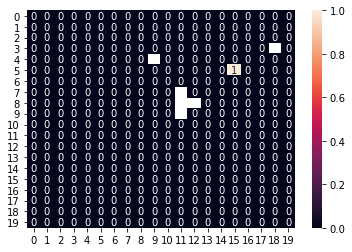

In [212]:
w=20
h=20
mw=16
mh=16
env=np.zeros((h,w),dtype=np.float64)
#nodes=[[1,mw-1],[1,mw-2],[1,mw-3],[3,mw-2],[4,9],[1,1]]
nodes=[[3,w-2],[4,9],[9,11],[8,12],[8,11],[7,11]]
#nodes=[]
env=grid_env(w=w,h=h,nodes=nodes,goal=goal)
nenv=env.make()
sns.heatmap(nenv,annot=True)
plt.show()

start=[h-1,0]
goal=[5,mw-1]
table,frames=dijkstra(start,goal)

[5, 15]
[6, 14]
[6, 13]
[6, 12]
[6, 11]
[7, 10]
[8, 9]
[9, 8]
[10, 7]
[11, 6]
[12, 5]
[13, 4]
[14, 3]
[15, 2]
[16, 1]
[17, 0]
[18, 0]
[19, 0]


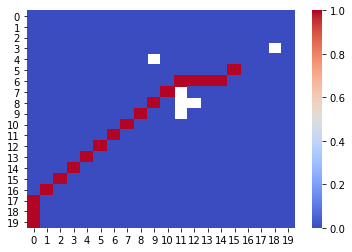

In [213]:
point=goal
path=[goal]
path_map=env.make()
%matplotlib inline
while(1):
   print(point)
   if point==start:break
   point=table[str(point)]['root']
   path.append(point)
   path_map[point[0],point[1]]=1
   
sns.heatmap(path_map,annot=False,cmap='coolwarm')
plt.show()

In [208]:
table

{'[19, 0]': {'xy': [19, 0], 'cost': 0, 'root': None},
 '[19, 1]': {'xy': [19, 1], 'cost': 1.0, 'root': [19, 0]},
 '[18, 0]': {'xy': [18, 0], 'cost': 1.0, 'root': [19, 0]},
 '[18, 1]': {'xy': [18, 1], 'cost': 1.4142135623730951, 'root': [19, 0]},
 '[19, 2]': {'xy': [19, 2], 'cost': 2.0, 'root': [19, 1]},
 '[18, 2]': {'xy': [18, 2], 'cost': 2.414213562373095, 'root': [19, 1]},
 '[17, 0]': {'xy': [17, 0], 'cost': 2.0, 'root': [18, 0]},
 '[17, 1]': {'xy': [17, 1], 'cost': 2.414213562373095, 'root': [18, 0]},
 '[17, 2]': {'xy': [17, 2], 'cost': 2.8284271247461903, 'root': [18, 1]},
 '[16, 0]': {'xy': [16, 0], 'cost': 3.0, 'root': [17, 0]},
 '[16, 1]': {'xy': [16, 1], 'cost': 3.414213562373095, 'root': [17, 0]},
 '[16, 2]': {'xy': [16, 2], 'cost': 3.82842712474619, 'root': [17, 1]},
 '[18, 3]': {'xy': [18, 3], 'cost': 3.414213562373095, 'root': [18, 2]},
 '[17, 3]': {'xy': [17, 3], 'cost': 3.82842712474619, 'root': [18, 2]},
 '[19, 3]': {'xy': [19, 3], 'cost': 3.0, 'root': [19, 2]},
 '[19, 4